<a href="https://colab.research.google.com/github/felixgper/Adidas/blob/master/Adiddas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *PROYECTO : ADIDAS*

Este es un proyecto nuevo que usaré para implementar mis conocimientos sobre data science.

Se buscará mejorar el data frame si así lo requiera como buscar un modelo de aprendizaje para que poder predecir con mayor exactitud.

---

# PREGUNTAS QUE BUSCAREMOS RESOLVER

El objetivo actual de mi proyeco es conocer un poco sobre el manejo de información como el modelo a usar para hacer unas predicciones mejores.

Dicho esto, se planteó las siguientes preguntas a ser resueltas:

- ¿Qué tienda realizó mas ventas?
- ¿Qué tienda hizo un mejor margen operativo?
- ¿Cuál fue la categoría mas vendida?
- ¿Qué metodo de venta fue la que tuvo mayor participación en ventas?

Con estas preguntas y el conocimiento que tenemos, buscaremos un mejor uso de información, este proyecto está dirigido a las distintas personas que deseen aprender técnica de análisis de datos y modelo predictivo.

# IMPORTACION DE LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from google.colab import files
import io

In [2]:
uploaded = files.upload()

Saving Adidas.xlsx to Adidas.xlsx


In [3]:
print(uploaded.keys())

dict_keys(['Adidas.xlsx'])


In [4]:
df = pd.read_excel(next(iter(uploaded)))

In [5]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2021-10-26,Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750.0,24062.5,0.35,Outlet
1,Foot Locker,1185732,2021-10-27,Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250.0,30375.0,0.30,Outlet
2,Foot Locker,1185732,2021-10-28,Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,45,475,213750.0,117562.5,0.55,Outlet
3,Foot Locker,1185732,2021-10-29,Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,45,125,56250.0,19687.5,0.35,Outlet
4,Foot Locker,1185732,2021-10-30,Northeast,Pennsylvania,Philadelphia,Women,Street Footwear,35,175,61250.0,24500.0,0.40,Outlet


In [6]:
# Definición de colores y estilo
sns.set_palette("pastel")
sns.set_style("whitegrid")

plt.style.use('ggplot')
colors = [
    '#4C72B0',  # Azul
    '#55A868',  # Verde
    '#C44E52',  # Rojo
    '#8172B2',  # Morado
    '#CCB974',  # Amarillo
    '#64B5CD',  # Azul claro
]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

# ANALISIS EXPLORATORIO DE DATOS

Las variables de nuestro conjunto de datos es:

- Retailer: El nombre del minorista o tienda que realizó la venta (en este caso, "Foot Locker").
- Retailer ID: Un identificador único para el minorista.
- Invoice Date: La fecha en que se emitió la factura de la venta.
- Region: La región geográfica donde se realizó la venta (por ejemplo, "Northeast").
- State: El estado donde se encuentra la tienda que realizó la venta.
- City: La ciudad donde se encuentra la tienda que realizó la venta.
- Gender Type: El género al que está destinado el producto (por ejemplo, "Men" para hombres o "Women" para mujeres).
- Product Category: La categoría del producto vendido (por ejemplo, "Apparel" para ropa, "Street Footwear" para calzado urbano, "Athletic Footwear" para calzado deportivo).
- Price per Unit: El precio por unidad del producto vendido.
- Units Sold: La cantidad de unidades del producto vendidas.
- Total Sales: El total de las ventas generadas por la transacción (Price per Unit * Units Sold).
- Operating Profit: El beneficio operativo obtenido de la venta.
- Operating Margin: El margen operativo de la venta (Operating Profit / Total Sales).
- Sales Method: El método de venta utilizado (por ejemplo, "Outlet").

# Información general sobre el conjunto de datos

In [7]:
# Verificar si tiene valores duplicados
df_duplicated = df.duplicated().sum()
print('Valores duplicado en tu conjunto de datos es: \n', df_duplicated)

print('---------------------------------------------------------------')

# Verificar si tenemos valores nulos
df_nulls = df.isnull().sum()
print('Valores nulos en tu conjunto de datos es: \n', df_nulls)

print('---------------------------------------------------------------')

# Tamaño de nuestro conjunto de datos
df_size = df.shape
print('Tamaño de nuestro conjunto de datos (fila x columna): \n',df_size)

print('---------------------------------------------------------------')

# Tipos de datos de nuestras variables
df_types = df.dtypes
print('Los tipos de variables en nuestro conjunto de datos son: \n', df_types)

print('---------------------------------------------------------------')

# Nombre de nuestras variables
df_columns = df.columns
print('Nombre de nuestras variables: \n', df_columns)

print('---------------------------------------------------------------')

# Estadísticas descriptivas de nuestras variables numericas
df_intcols = df.select_dtypes(exclude=['object', 'datetime64[ns]'])
estadisticas_df = df_intcols.describe().round(2)
print('Estadisticas descriptivas:')
estadisticas_df

# Frecuencia de valores únicos en las variables categóricas
for col in df.select_dtypes(include='object').columns:
    print('Frecuencia de valores únicos: \n', col)
    print(df[col].value_counts())

Valores duplicado en tu conjunto de datos es: 
 0
---------------------------------------------------------------
Valores nulos en tu conjunto de datos es: 
 Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Gender Type         0
Product Category    0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64
---------------------------------------------------------------
Tamaño de nuestro conjunto de datos (fila x columna): 
 (9648, 14)
---------------------------------------------------------------
Los tipos de variables en nuestro conjunto de datos son: 
 Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Gender Type                 object
Product Category      

Nos hemos percatado que en nuestro conjunto de datos, esta mal sacado el total venta, por lo tanto, lo haremos de forma manual con el siguiente código:

In [8]:
df['Total Sales'] = df['Units Sold'] * df['Price per Unit']
df['Operating Profit'] = df['Total Sales'] * df['Operating Margin']

In [9]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2021-10-26,Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,6875,2406.25,0.35,Outlet
1,Foot Locker,1185732,2021-10-27,Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,10125,3037.50,0.30,Outlet
2,Foot Locker,1185732,2021-10-28,Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,45,475,21375,11756.25,0.55,Outlet
3,Foot Locker,1185732,2021-10-29,Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,45,125,5625,1968.75,0.35,Outlet
4,Foot Locker,1185732,2021-10-30,Northeast,Pennsylvania,Philadelphia,Women,Street Footwear,35,175,6125,2450.00,0.40,Outlet


# ANALISIS DE DISTRIBUCIÓN

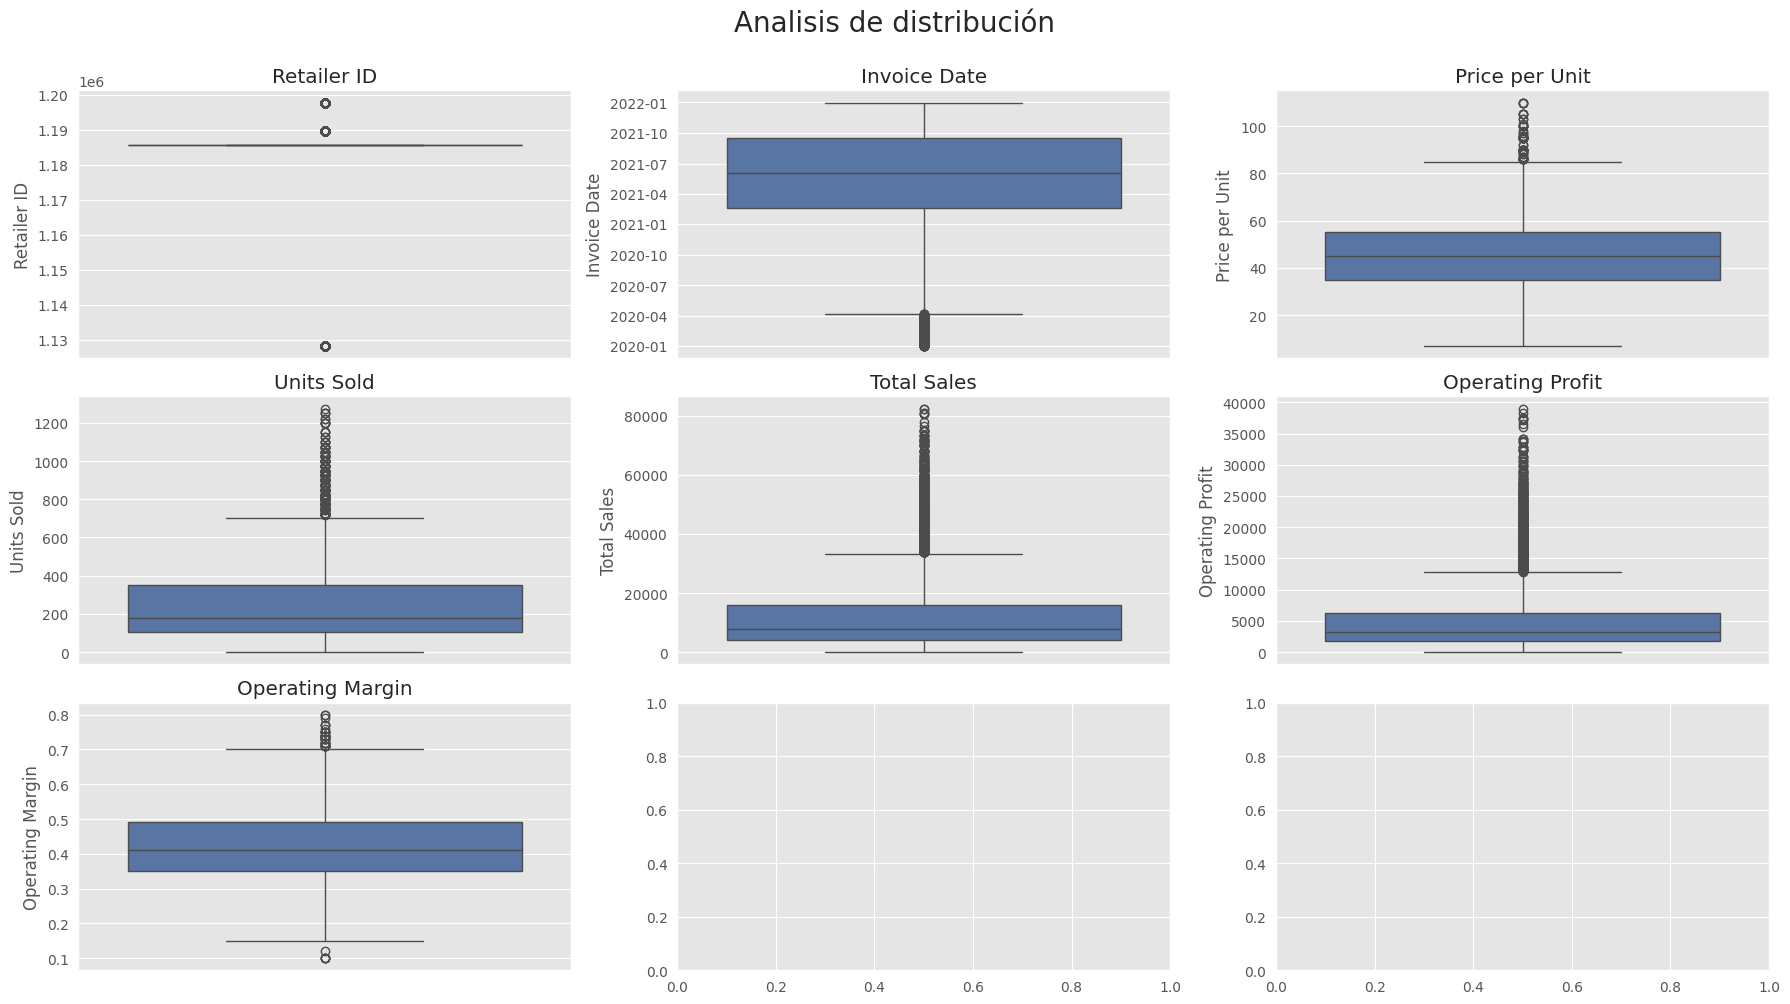

In [10]:
# Seleccionamos columnas numericas
int_cols = df.select_dtypes(exclude='object').columns

nplots = len(int_cols)
nrows = 3

cols = nplots // nrows + (nplots % nrows)

fig, axs = plt.subplots(nrows=nrows, ncols= cols, figsize = (18,10))
plt.suptitle('Analisis de distribución', fontsize = 20, y = 1.0)

for i, col in enumerate(int_cols):
    ax = axs[i // cols , i % cols] if nrows > 1 else axs[i % cols]
    sns.boxplot(data = df, y = col, ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

## Hallamos la correlación

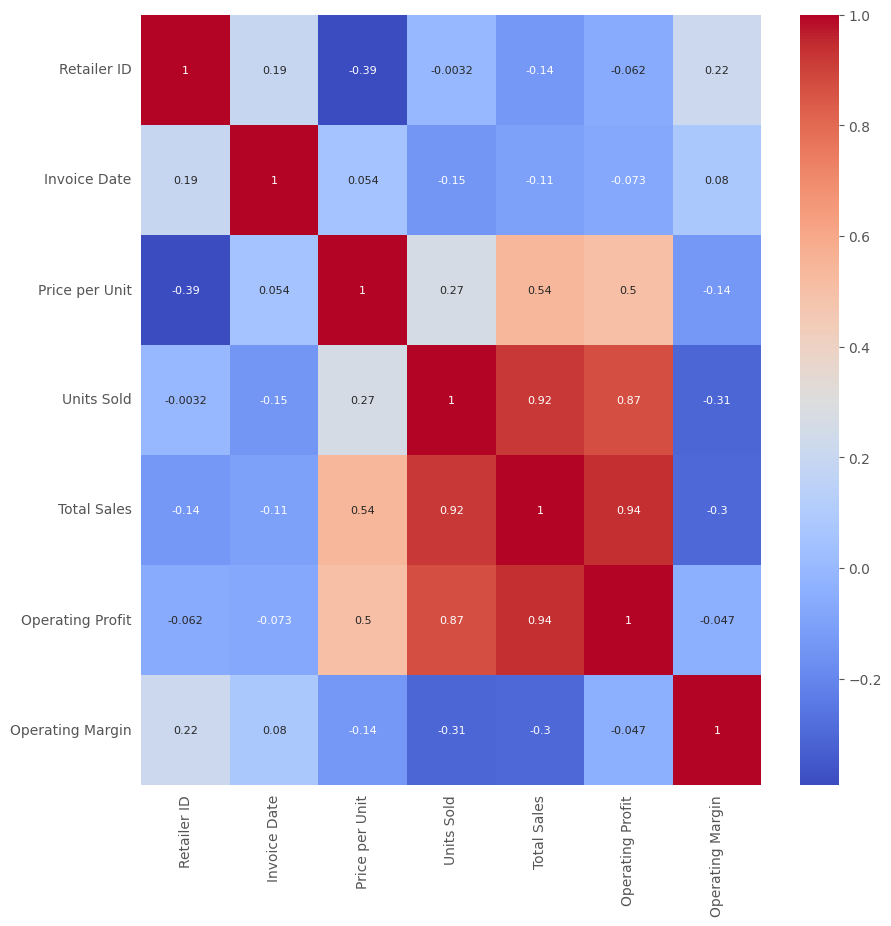

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data = df[int_cols].corr(), annot= True, annot_kws= {'size' : 8}, cmap= 'coolwarm')
plt.show()

# DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS

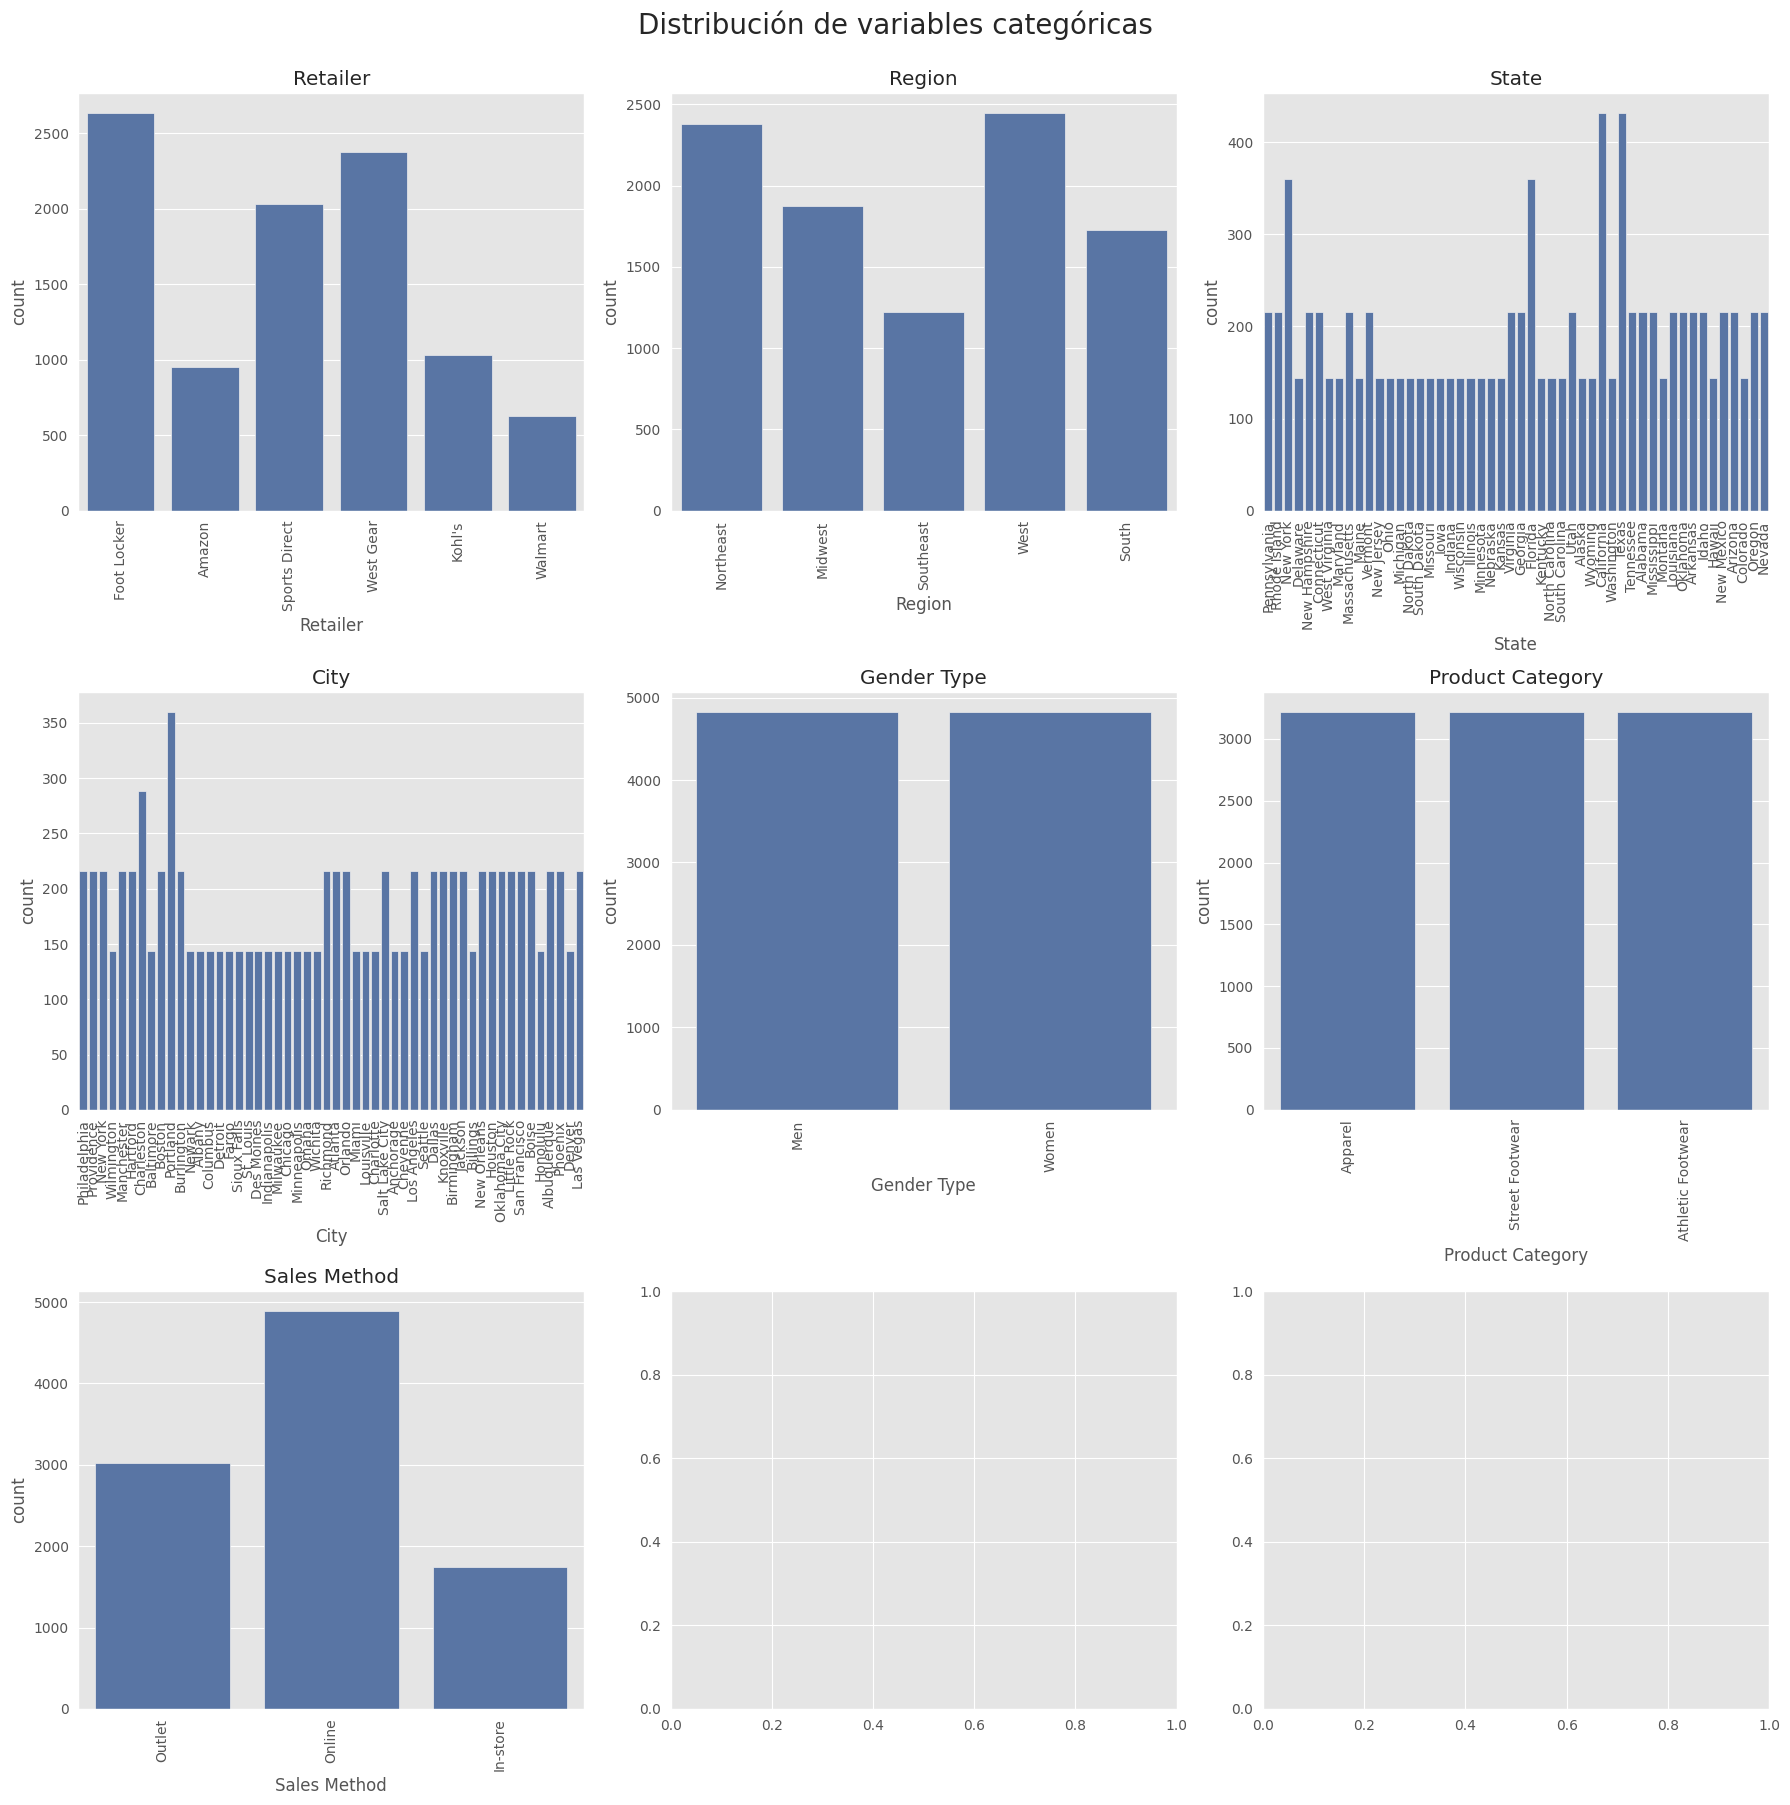

In [12]:
cat_cols = df.select_dtypes(include='object').columns

nplots = len(cat_cols)
nrows = 3

cols = nplots // nrows + (nplots % nrows)

fig, axs = plt.subplots(nrows= nrows, ncols= cols, figsize = (18,18))
plt.suptitle('Distribución de variables categóricas', fontsize = 20, y = 1.0)

for i, col in enumerate(cat_cols):
    ax = axs[i // cols , i % cols] if nrows > 1 else axs [i % cols]
    sns.countplot(data = df, x = col, ax = ax)
    ax.tick_params(axis='x', rotation=90)
    ax.set_title(col)
plt.tight_layout()
plt.show()

Como uno de nuestras preguntas es sobre el método de venta, se filtrará por ello mismo.

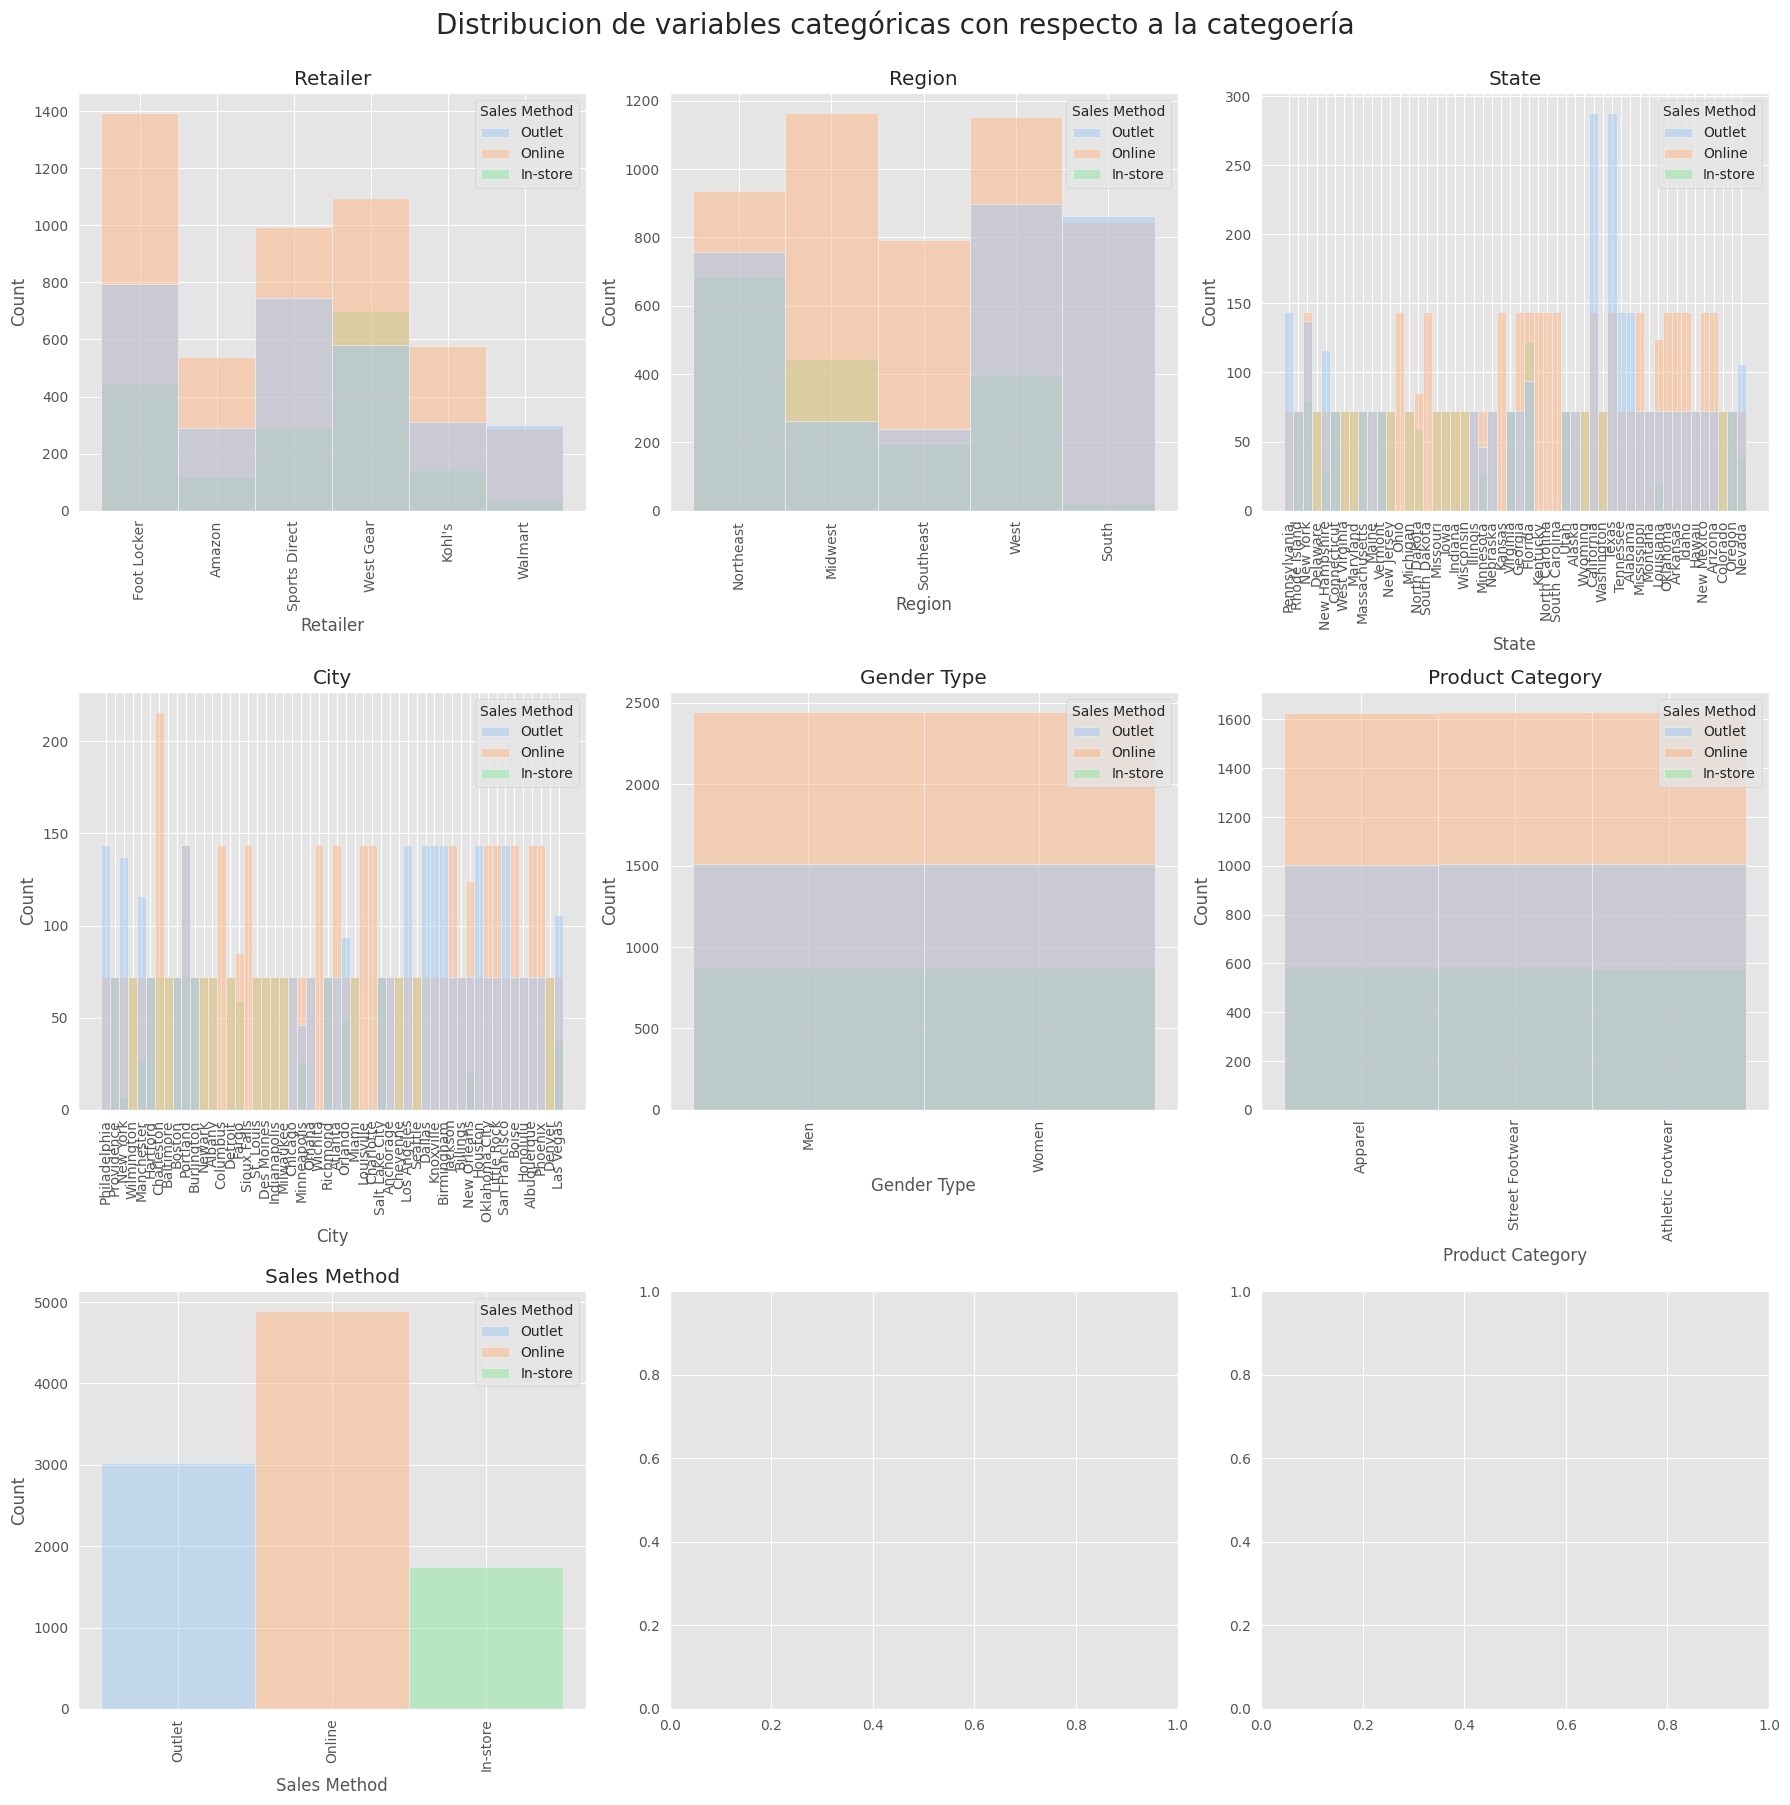

In [13]:
nplots = len(cat_cols)
nrow = 3

cols = nplots // nrow + (nplots % nrow)

fig , axs = plt.subplots(nrows=nrow, ncols= cols, figsize = (18,18))
plt.suptitle('Distribucion de variables categóricas con respecto a la categoería', fontsize = 20, y= 1.0)

for i, col in enumerate(cat_cols):
    ax = axs[i // cols, i % cols] if nrow > 1 else axs[i % cols]
    sns.histplot(data= df, x = col, ax= ax, hue = 'Sales Method', palette= 'pastel')
    ax.tick_params(axis='x', rotation=90)
    ax.set_title(col)
plt.tight_layout()
plt.show()

Esto que se realizó fue muy bueno; puesto que nos da a un mejor panorama sobre los métodos de venta y que tanto estos representan.

# DISTRIBUCION DE VARIABLES NUMÉRICAS

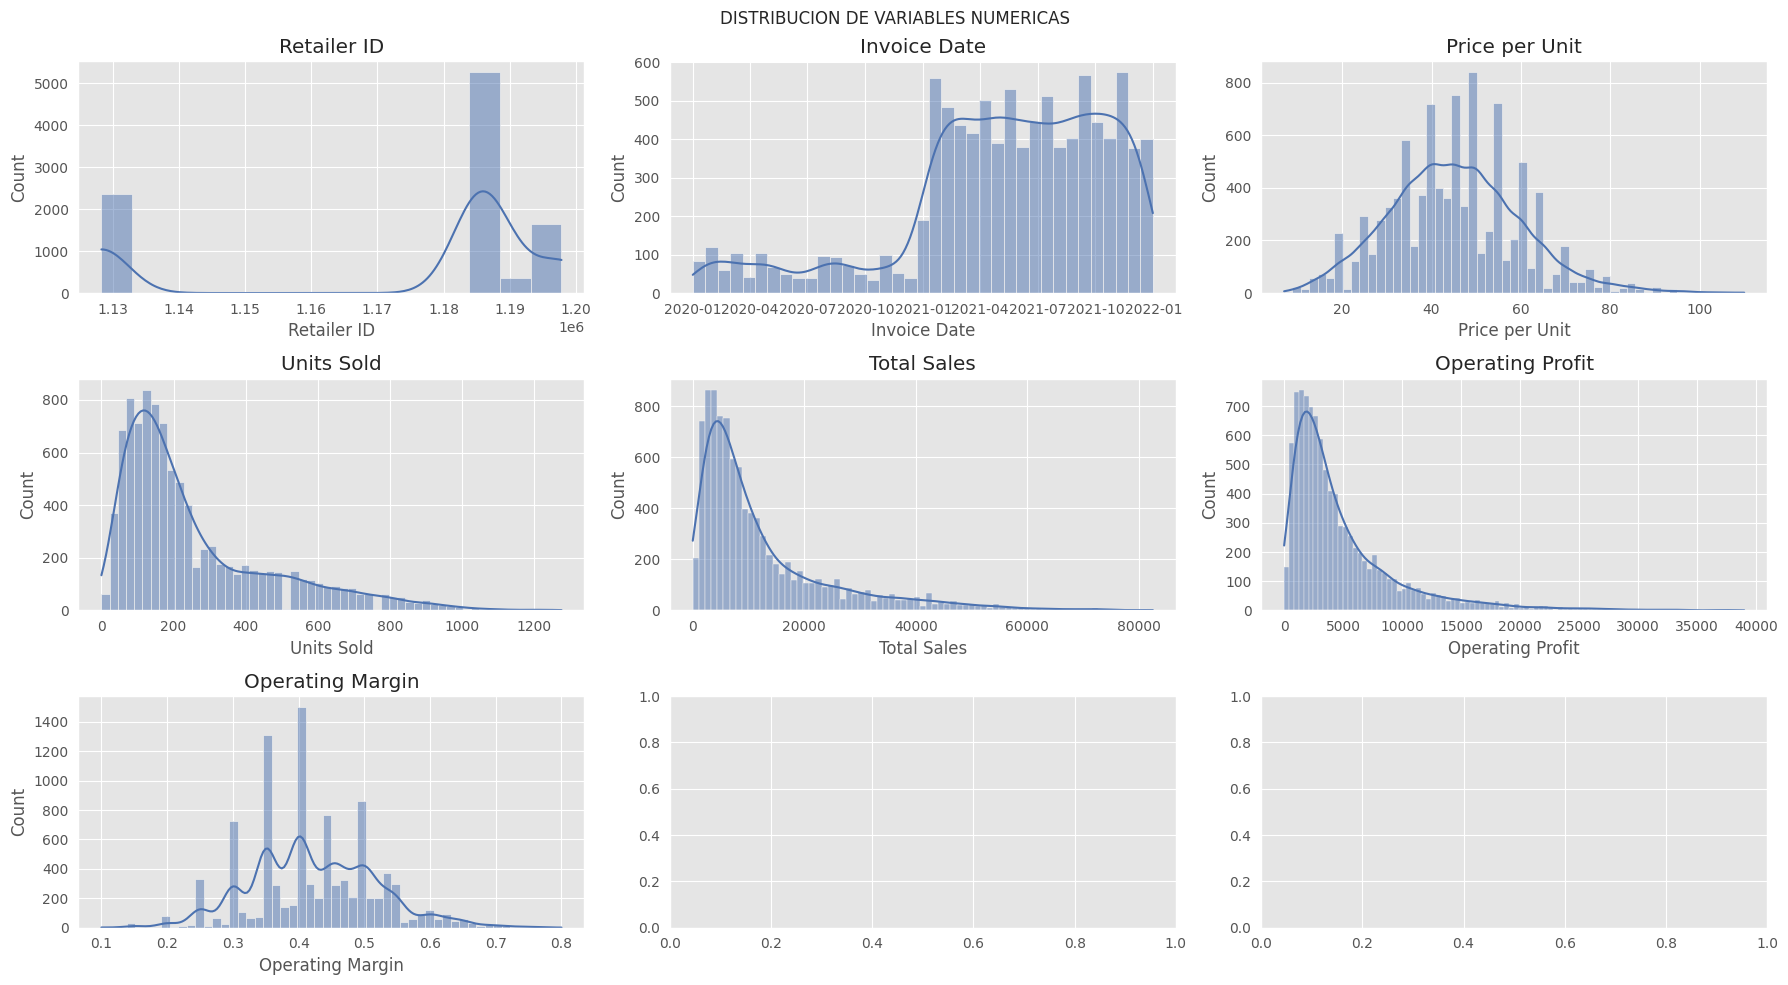

In [14]:
int_cols = df.select_dtypes(exclude= 'object').columns

nplots = len(int_cols)
nrows = 3

cols = nplots // nrows + (nplots % nrows)
fig, axs = plt.subplots(nrows= nrows, ncols=cols, figsize = (18,10))
plt.suptitle('DISTRIBUCION DE VARIABLES NUMERICAS')

for i, col in enumerate(int_cols):
    ax = axs[i // cols, i % cols] if nrows > 1 else axs[i % cols]
    sns.histplot(data = df, x = col, ax = ax, kde = True)
    ax.set_title(col)
plt.tight_layout()
plt.show()

Media de Retailer ID: 1173849.7235696518
Media de Invoice Date: 2021-05-10 15:20:44.776119552
Media de Price per Unit: 45.21662520729685
Media de Units Sold: 256.9300373134328
Media de Total Sales: 12455.083955223881
Media de Operating Profit: 4894.793501243781
Media de Operating Margin: 0.42299129353233833


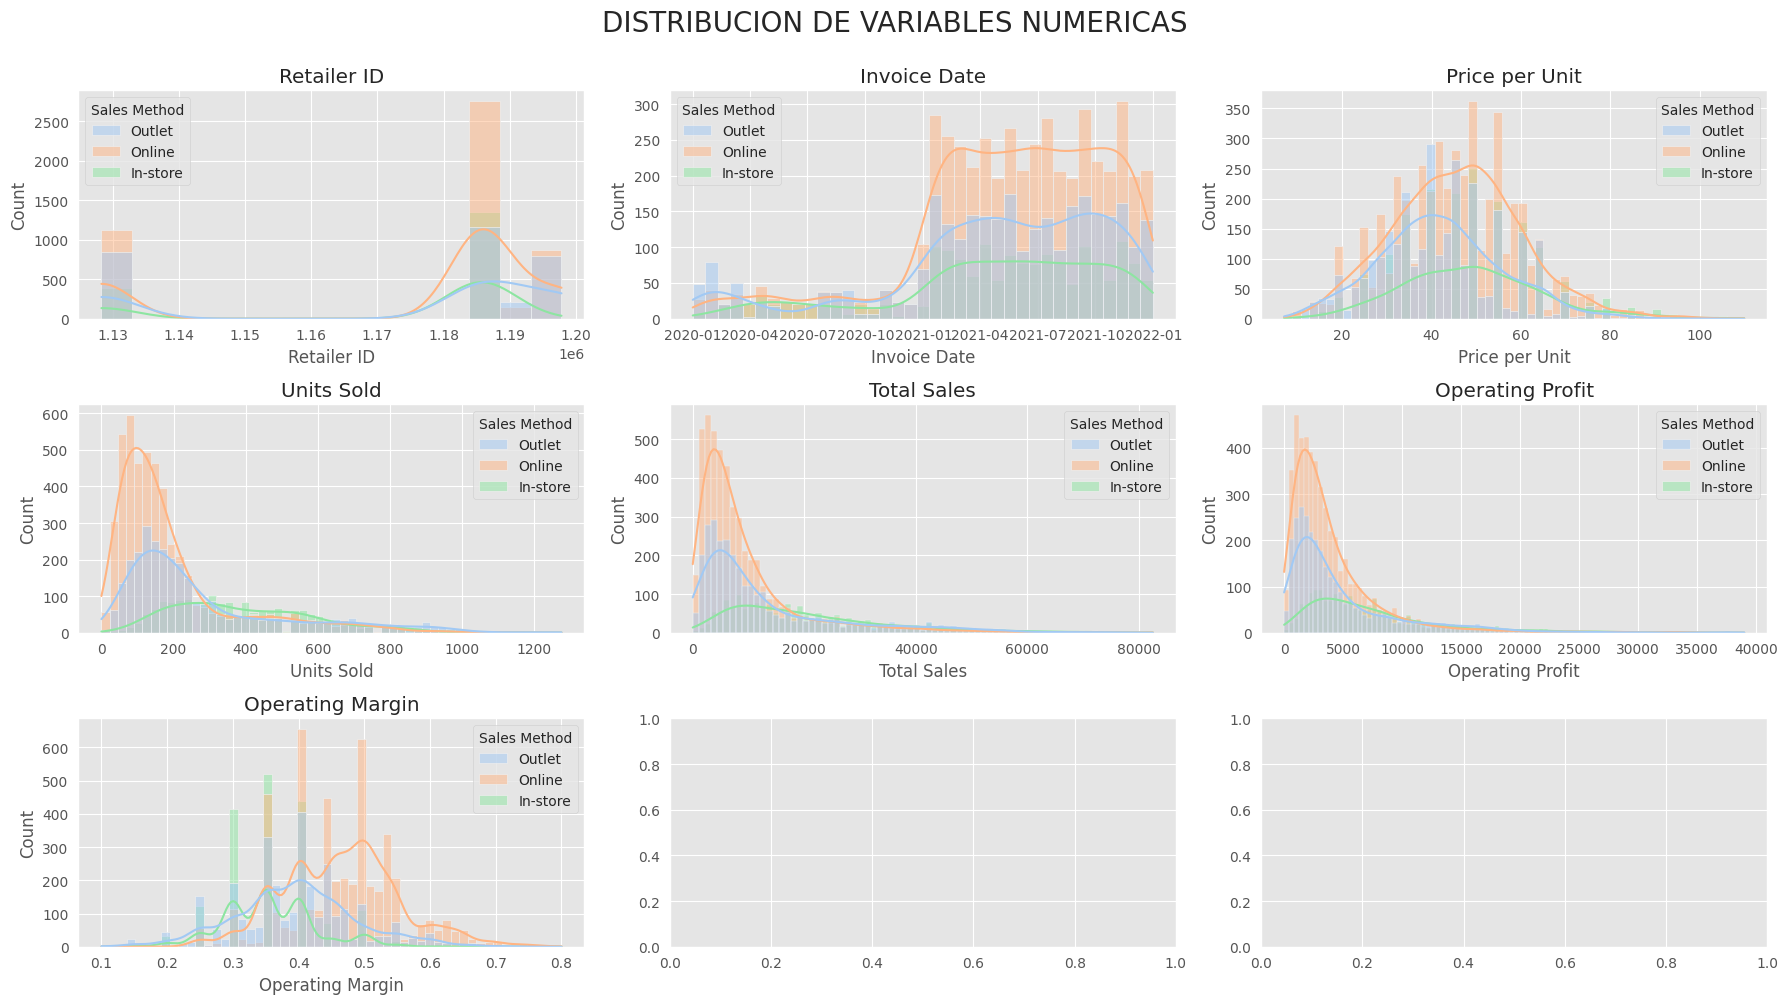

In [15]:
int_cols = df.select_dtypes(exclude= 'object').columns

nplots = len(int_cols)
nrows = 3

cols = nplots // nrows + (nplots % nrows)
fig, axs = plt.subplots(nrows= nrows, ncols=cols, figsize = (18,10))
plt.suptitle('DISTRIBUCION DE VARIABLES NUMERICAS', fontsize = 20, y = 1.0)

for i, col in enumerate(int_cols):
    ax = axs[i // cols, i % cols] if nrows > 1 else axs[i % cols]
    sns.histplot(data = df, x = col, ax = ax, kde = True, hue = 'Sales Method', palette = 'pastel')
    ax.set_title(col)
    print(f'Media de {col}: {df[col].mean()}')
plt.tight_layout()
plt.show()

De esto podemos sacar mas información, por ejemplo que el on line, viene a ser lo mas rentable dentro de los métodos de venta, así como el que mejor margina por venta realizada. Esto a pesar de no tener precio agresivos.

# PORCENTAJE DE VENTA ONLINE

In [16]:
df_copy = df[df['Sales Method'] == 'Online']
df_men = df_copy['Sales Method'].count()
df_total = df['Sales Method'].count()
type_rate = (df_men/df_total)
type_rate_percent = '{:.2%}'.format(type_rate)
print('Tasa de porcentaje de la compra realizada online :', type_rate_percent)

Tasa de porcentaje de la compra realizada online : 50.67%


# ANALISIS ESPECIFICO PARA RESPONDER NUESTRAS PREGUNTAS

Hemos realizado nuestro analisis de distribución tanto para la variable categórica como numérica y nos hemos dado cuenta que la venta online es un método de venta que abarca el 50.67% de transacciones realizadas, y segun los gráficos esto tbn está plasmado en sus ventas como cantidad vendidas.

Con esto ya respondimos una de las preguntas que nos hemos propuesto al principio del proyecto. A continuación se realizará tablas de contingencia para poder resolver nuestras dudas.

Ventas totales a lo largo del tiempo

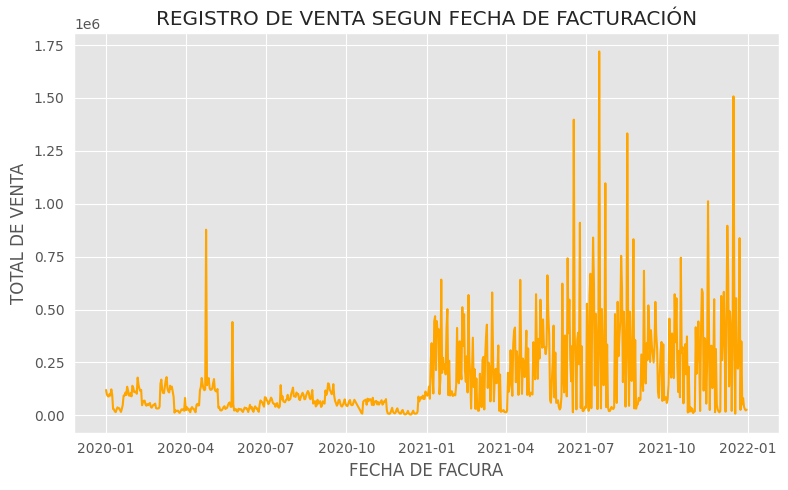

In [17]:
plt.figure(figsize=(8,5))
sales_time = df.groupby('Invoice Date')['Total Sales'].sum().reset_index()
sns.lineplot(data = sales_time, x = 'Invoice Date', y = 'Total Sales', color = 'orange')
plt.title('REGISTRO DE VENTA SEGUN FECHA DE FACTURACIÓN')
plt.xlabel('FECHA DE FACURA')
plt.ylabel('TOTAL DE VENTA')
plt.tight_layout()
plt.show()

Pregunta : ¿Qué tienda realizó mas ventas?

In [18]:
cont_retail = df.groupby('Retailer').agg({'Units Sold': 'sum','Total Sales': 'sum'}).sort_values(by = 'Total Sales',ascending = False).reset_index()
cont_retail.set_index('Retailer', inplace= True)
cont_retail['percent'] = (cont_retail['Total Sales']/cont_retail['Total Sales'].sum())*100
cont_retail['percent'] = cont_retail['percent'].round(2)
cont_retail

,Units Sold,Total Sales,percent
Retailer,,,
West Gear,625262,32409558,26.97
Foot Locker,604369,29024945,24.15
Sports Direct,557640,24616622,20.49
Kohl's,287375,13512453,11.24
Walmart,206225,10506085,8.74
Amazon,197990,10096987,8.40


<Figure size 2000x1500 with 0 Axes>

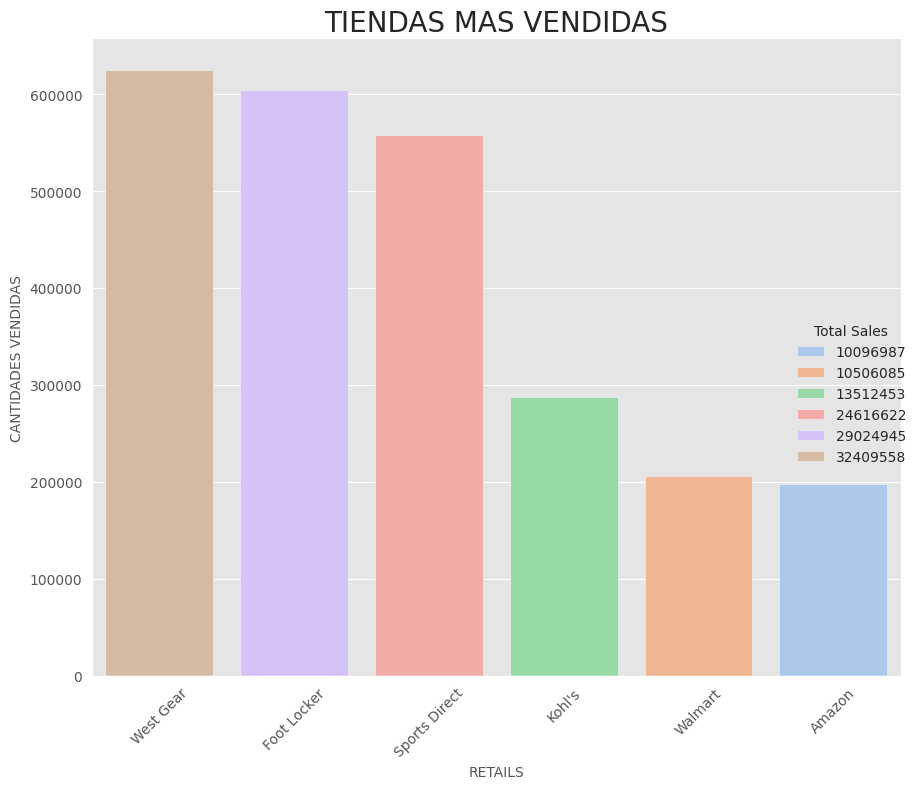

In [19]:
plt.figure(figsize= (20,15))
sns.catplot(data=cont_retail, x='Retailer', y = 'Units Sold', palette= 'pastel', kind= 'bar', hue = 'Total Sales', height= 8)
plt.title('TIENDAS MAS VENDIDAS', fontsize = 20, y = 1.0)
plt.xlabel('RETAILS', fontsize = 10)
plt.ylabel('CANTIDADES VENDIDAS', fontsize = 10)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Pregunta : ¿Qué tienda hizo un mejor margen operativo?

In [20]:
cont_margen = df.groupby('Retailer').agg({'Units Sold': 'sum', 'Operating Profit': 'sum', 'Total Sales': 'sum'}).reset_index()
cont_margen['Operating Margin'] = (cont_margen['Operating Profit'] / cont_margen['Total Sales']).round(3)
cont_margen = cont_margen.sort_values(by='Operating Profit', ascending=False).set_index('Retailer')
cont_margen['percent'] = (cont_margen['Operating Profit'] / cont_margen['Operating Profit'].sum()) * 100
cont_margen['percent'] = cont_margen['percent'].round(2)
cont_margen = cont_margen.sort_values(by = 'Operating Margin', ascending = False)
cont_margen


,Units Sold,Operating Profit,Total Sales,Operating Margin,percent
Retailer,,,,,
Sports Direct,557640,10641608.71,24616622,0.432,22.53
Amazon,197990,3984432.06,10096987,0.395,8.44
Foot Locker,604369,11317027.31,29024945,0.390,23.96
Kohl's,287375,5182260.08,13512453,0.384,10.97
West Gear,625262,12196890.68,32409558,0.376,25.83
Walmart,206225,3902748.86,10506085,0.371,8.26


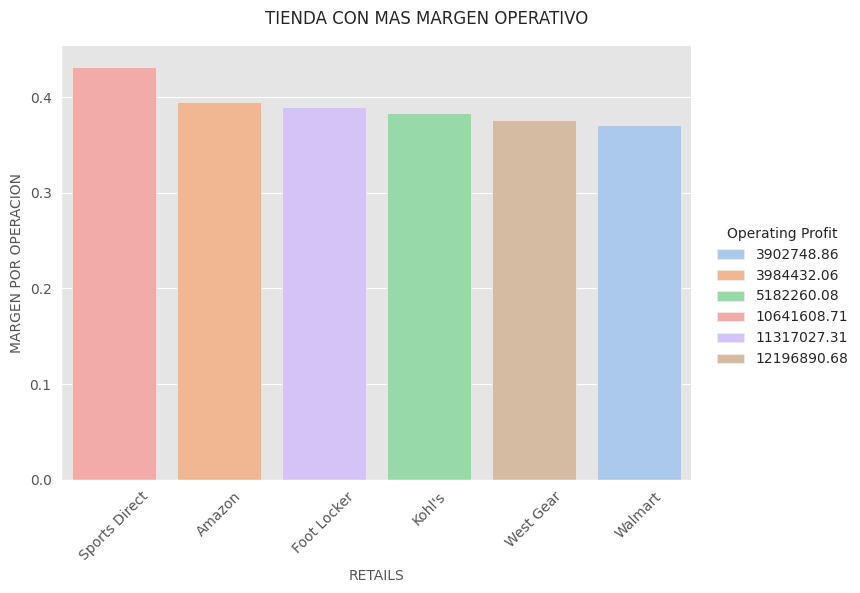

In [21]:
catplot = sns.catplot(kind='bar', palette='pastel', y='Operating Margin', x='Retailer', data=cont_margen, hue='Operating Profit', height=6, aspect=1.2)
catplot.set_axis_labels('RETAILS', 'MARGEN POR OPERACION', fontsize=10)
catplot.set_xticklabels(rotation=45)
catplot.fig.suptitle('TIENDA CON MAS MARGEN OPERATIVO')
catplot.tight_layout()
plt.show()


Pregunta : ¿Cuál fue la categoría mas vendida?

In [22]:
cont_cat = df.groupby('Product Category')['Total Sales'].sum().sort_values(ascending= False).reset_index()
cont_cat['Porcentaje'] =( cont_cat['Total Sales']/cont_cat['Total Sales'].sum())*100
cont_cat['Porcentaje'] = cont_cat['Porcentaje'].round(2)
cont_cat

,Product Category,Total Sales,Porcentaje
0,Street Footwear,44882332,37.35
1,Apparel,40391617,33.61
2,Athletic Footwear,34892701,29.04


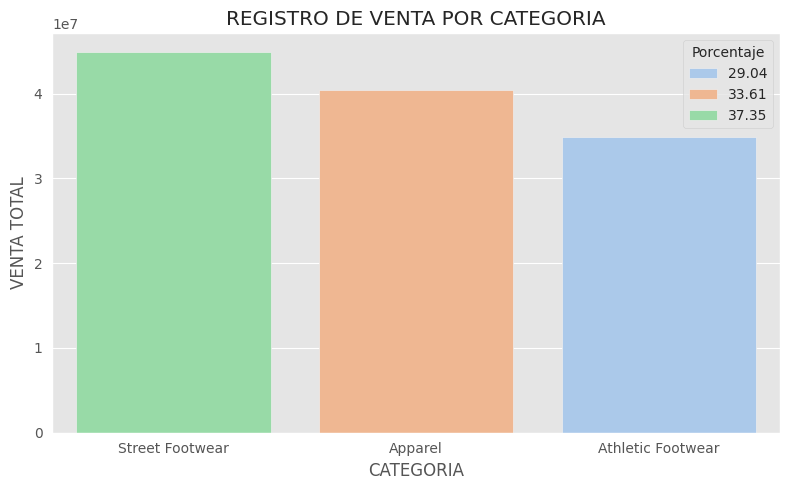

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(data = cont_cat, x = 'Product Category', y = 'Total Sales', palette = 'pastel', hue = 'Porcentaje')
plt.title('REGISTRO DE VENTA POR CATEGORIA')
plt.xlabel('CATEGORIA')
plt.ylabel('VENTA TOTAL')
plt.tight_layout()
plt.show()

Pregunta : ¿Qué metodo de venta fue la que tuvo mayor participación en ventas?

In [24]:
con_method = df.groupby('Sales Method')['Units Sold'].sum().reset_index()
con_method['Porcentaje'] = (con_method['Units Sold']/con_method['Units Sold'].sum())*100
con_method['Porcentaje'] = con_method['Porcentaje'].round(2)
con_method = con_method.sort_values(by = 'Units Sold', ascending= False)
con_method

,Sales Method,Units Sold,Porcentaje
1,Online,939093,37.88
2,Outlet,849778,34.28
0,In-store,689990,27.83


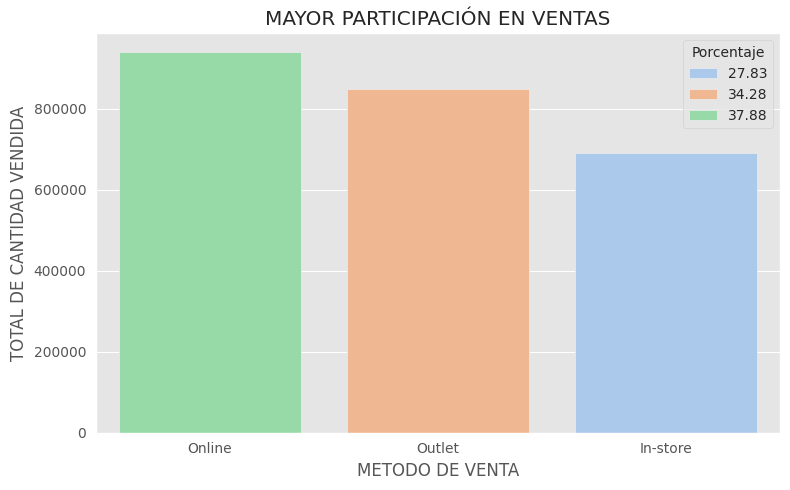

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(data = con_method, x = 'Sales Method', y = 'Units Sold', palette = 'pastel', hue = 'Porcentaje')
plt.title('MAYOR PARTICIPACIÓN EN VENTAS')
plt.xlabel('METODO DE VENTA')
plt.ylabel('TOTAL DE CANTIDAD VENDIDA')
plt.tight_layout()
plt.show()

De estos gráficos podemos afirmar ciertas cosas, como la mayor venta de la categoría o la mayor participación en el methodo de venta. En este último, podemos evidenciar que a pesar del precio que estos tienen, el mayor porcentaje de ventas fue de manera online, con esto podemos decir, que si ya este método está funcionando, entonces no descuidarlo, así mismo, revisar el profit para ver que tanto es la ganancia operaitva de este método.

Con esto haremos otro gráfico donde relacione el profit con el 'online', para saber cuanto es la ganancia por la operacion que se hizo mediante este método. Así mismo podemos incluir un gráfico adicional que consta de venta por región.

## Venta por región

In [26]:
cont_region = df.groupby('Region')['Total Sales'].sum().sort_values(ascending= False).reset_index()
cont_region['percent'] = (cont_region['Total Sales']/cont_region['Total Sales'].sum())*100
cont_region['percent'] = cont_region['percent'].round(2)
cont_region

,Region,Total Sales,percent
0,West,36436157,30.32
1,Northeast,25078267,20.87
2,Southeast,21374436,17.79
3,South,20603356,17.15
4,Midwest,16674434,13.88


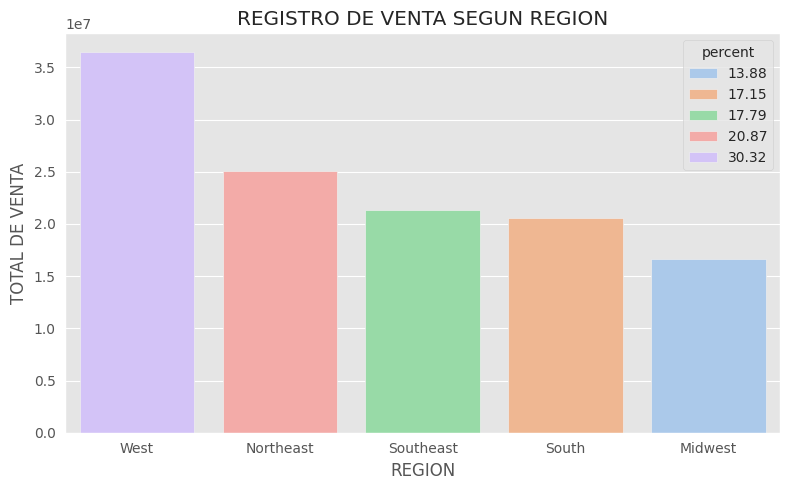

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(data = cont_region, x = 'Region', y = 'Total Sales', palette = 'pastel', hue = 'percent')
plt.title('REGISTRO DE VENTA SEGUN REGION')
plt.xlabel('REGION')
plt.ylabel('TOTAL DE VENTA')
plt.tight_layout()
plt.show()

## Ganancia de la operación según su método de venta

In [28]:
con_profit = df.groupby('Sales Method')['Operating Profit'].sum().reset_index()
con_profit['Porcentaje'] = (con_profit['Operating Profit']/con_profit['Operating Profit'].sum())*100
con_profit['Porcentaje'] = con_profit['Porcentaje'].round(2)
con_profit = con_profit.sort_values(by = 'Operating Profit', ascending= False)
con_profit

,Sales Method,Operating Profit,Porcentaje
1,Online,19552537.72,41.40
2,Outlet,14913301.23,31.58
0,In-store,12759128.75,27.02


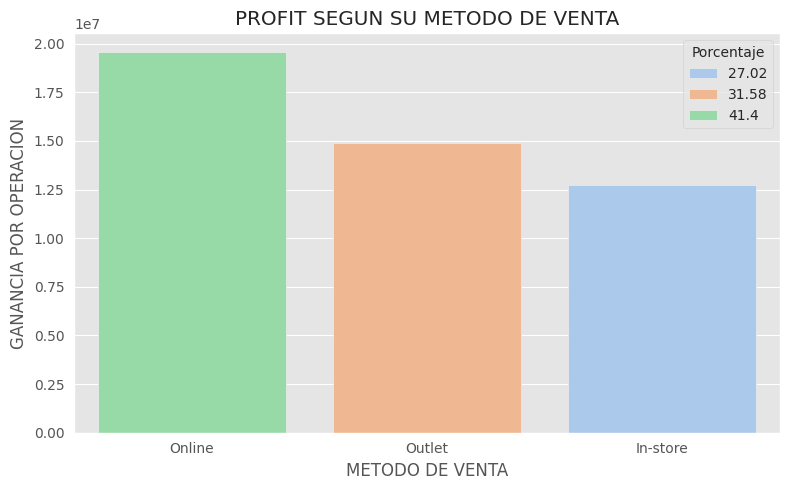

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(data = con_profit, x = 'Sales Method', y = 'Operating Profit', palette = 'pastel', hue = 'Porcentaje')
plt.title('PROFIT SEGUN SU METODO DE VENTA')
plt.xlabel('METODO DE VENTA')
plt.ylabel('GANANCIA POR OPERACION')
plt.tight_layout()
plt.show()

Podemos ver de los gráficos realizados en total, el método de venta mas rentable, con mayor participación y mas ganancia es el 'online'. Así mismo que la región mas vendida fue del lado Oeste. Con esto podemos ya resolver nuestras preguntas propuestas en un inicio:

¿Qué tienda realizó mas ventas?

West Gear es la tienda mas vendida con un total de '625262' en cantidades vendidas representando '32409558' en total vendido. Con esto de que el método mas rentable es el 'online', nos da la duda de saber de esta tienda cuantas transacciones fueron por este metodo.

<Figure size 1000x1000 with 0 Axes>

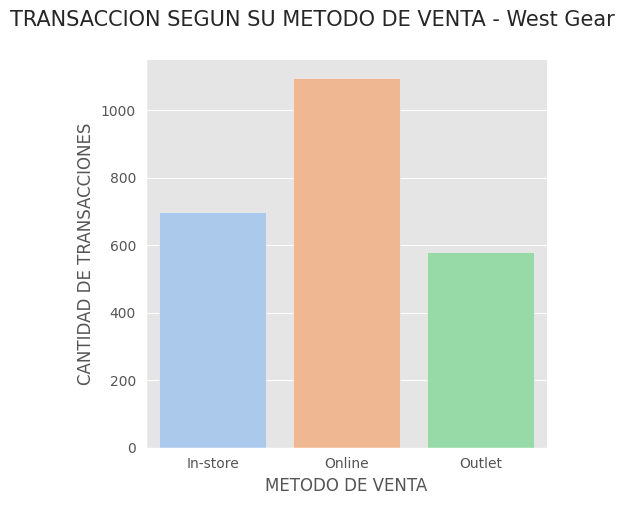

In [30]:
df_west = df[df['Retailer'] == 'West Gear']
cont_west = df_west.groupby('Sales Method')['Retailer'].count().reset_index()
plt.figure(figsize = (10,10))
sns.catplot(kind = 'bar', data = cont_west, x = 'Sales Method', y = 'Retailer', hue = 'Sales Method', height= 5, palette= 'pastel')
plt.suptitle('TRANSACCION SEGUN SU METODO DE VENTA - West Gear', fontsize = 15, y = 1.0)
plt.xlabel('METODO DE VENTA')
plt.ylabel('CANTIDAD DE TRANSACCIONES')
plt.tight_layout()
plt.show()

Ya con esto enemos más claro el panorama, que el método de venta para la tienda que generó mas ingreso es el 'on line'.

¿Qué tienda hizo un mejor margen operativo?

Para realizar esta pregunta, tuvimos que formularla 3 veces; ya que al principio habiamos sumado todo el margen operativo, lo cual no puede ser, lo segundo que se realizo, es sacar un promedio segun el margen operativo de tienda, pero esto tampoco es tan fiable. Entonces recurrimos a las matemáticas el cual después de hacer nuestra tabla de contingencia dividimos las ganancias obtenidas por operacion entre el total de ventas, con esto pudimos calcular el margen operativo de cada tienda.

¿Cuál fue la categoría mas vendida?

La categoría mas vendida fue el 'Steet Footwear', esto suponemos que es por ser un prenda muy particular y esencial en el out fit de la persona, esta categoría representa un 37.35 %  del total vendido, siendo esto '44882332' en venta.

¿Qué metodo de venta fue la que tuvo mayor participación en ventas?

Esta pregunta fue hecha al principio, pero en forma que iba avanzando el proyecto, fue parte crucial para poder solventar dudas como resolver nuestras preguntas.

Respondiendo nuetra pregunta, no es ninguna novedad que el 'online' sea el metodo que tuvo mayor participacion, maryor cantidad vendida y mayor venta, esto contando tambien con un margen positivo. Esto podemos intrepetarlo en los primeros gráficos en donde podiamos visualizar que el precio costo de algunos estaban elevados en compracion con el resto, pero habian sido vendidos por el metodo 'online'.

# INFORME SOBRE EL ANALISIS DE LA PARTICIPACION DEL METODO ONLINE

Despues de todo lo dicho líneas arriba, podemos afirmar con exactitud que el metodo de venta 'online' es el de mayor participación en ventas y así mismo en beneficio.

Esto es muy buena para las empresas; ya que, el tener una venta 'online' es sinónimo de simplificar, esto es la opración que se realiza. Sin embargo, esto va de la mano con los otros metodos, ya se ade venta en fisico como venta en promoción.

El metodo 'online' representa un 41.40 % de ganancia obtenida por operacion realizada en todas sus ventas. mas de la tercera parte y obtuve tambien un 37.88% en participación de cantidades vendidas.

Podemos decir que lo vendida va directamente proporcional a la ganancia por operación.

# ENTRENAMIENTO Y TESTEO

## Division de datos

In [31]:
X = df[['Price per Unit', 'Units Sold', 'Operating Profit', 'Operating Margin']]
y = df['Total Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrenamiento y evaluación de modelos:

Para este proyectos hemos eligido hacernos con los siguientes modelos de aprendizaje:

- Regresión lineal
- Arboles de decisión
- Random Forest

# REGRESION LINEAL

In [32]:
# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred_ridge = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)
print("Error cuadrático medio:", mse)
print("Coeficiente de determinación (R²) del modelo de regresión lineal:", r2.round(2))

Error cuadrático medio: 5916775.466730881
Coeficiente de determinación (R²) del modelo de regresión lineal: 0.96


# ARBOLES DE DECISION

In [33]:
# Entrenar el modelo de regresión lineal
dt = DecisionTreeRegressor(random_state = 42)
dt.fit(X_train, y_train)

# Hacer predicciones
y_pred_dt = dt.predict(X_test)

# Evaluar el modelo
mse = (mean_squared_error(y_test, y_pred_dt)).round(2)
r2 = r2_score(y_test, y_pred_dt)
print("Error cuadrático medio:", mse)
print("Coeficiente de determinación (R²) del modelo de regresión lineal:", r2.round(2))

Error cuadrático medio: 346926.12
Coeficiente de determinación (R²) del modelo de regresión lineal: 1.0


# RANDOM FOREST

In [34]:
# Ajustar el modelo de random forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = rf.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred_rf).round(2)
r2 = r2_score(y_test, y_pred_rf)
print("Error cuadrático medio:", mse)
print("Coeficiente de determinación (R²) del modelo de regresión lineal:", r2.round(2))

Error cuadrático medio: 238038.49
Coeficiente de determinación (R²) del modelo de regresión lineal: 1.0


# VALIDACION CRUZADA

In [35]:
num_folds = 5

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

models = [
    ('Regresion Lineal', LinearRegression()),
    ('Arbol de Decision', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor(n_estimators=500))
]

# Metricas
results = []
names = []
print('Metricas \n----------------------\n')
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {round(cv_results.mean(), 5)} ({round(cv_results.std(), 5)})')

Metricas 
----------------------

Regresion Lineal: 0.96214 (0.00169)
Arbol de Decision: 0.99672 (0.00141)
Random Forest: 0.99847 (0.00043)


# HIPERPARAMETROS

In [36]:
# Hiperparámetros
params = [
    {'Regresion Lineal__fit_intercept': [True, False]},
    {'Arbol de Decision__max_depth': [2, 4, 6],
    'Arbol de Decision__min_samples_split': [2, 4, 6]},
    {'Random Forest__n_estimators': [50, 100, 200],
    'Random Forest__max_depth': [None, 10, 20],
    'Random Forest__min_samples_split': [2, 5, 10]}
]

result = []
best_models = []

# Búsqueda de hiperparámetros para cada modelo
models = [
    ('Regresion Lineal', LinearRegression()),
    ('Arbol de Decision', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor())
]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for i, (name, model) in enumerate(models):
    pipe = Pipeline([(name, model)])
    grid = GridSearchCV(pipe, params[i], cv=5, scoring='r2', n_jobs=-1, error_score='raise')
    grid.fit(X_train, y_train)

    best_model = (name, grid.best_estimator_)
    best_score = grid.best_score_
    best_models.append(best_model)
    result.append({'Modelo': name, 'Score': round(best_score, 5), 'Hiperparámetros': grid.best_params_})

    print(name + ':')
    print('Mejores parametros:', grid.best_params_)
    print('Precisión del entrenamiento:', round(grid.best_score_, 5))
    print('Precisión del test:', round(grid.score(X_test, y_test), 5))
    print('--------------------------------------------')

# Ordenamiento de los resultados
result = sorted(result, key=lambda k: k['Score'], reverse=True)
print('Orden de los modelos: ')
for res in result:
    print(res)

Regresion Lineal:
Mejores parametros: {'Regresion Lineal__fit_intercept': True}
Precisión del entrenamiento: 0.96214
Precisión del test: 0.96355
--------------------------------------------
Arbol de Decision:
Mejores parametros: {'Arbol de Decision__max_depth': 6, 'Arbol de Decision__min_samples_split': 4}
Precisión del entrenamiento: 0.97932
Precisión del test: 0.97905
--------------------------------------------
Random Forest:
Mejores parametros: {'Random Forest__max_depth': 20, 'Random Forest__min_samples_split': 2, 'Random Forest__n_estimators': 200}
Precisión del entrenamiento: 0.99825
Precisión del test: 0.99871
--------------------------------------------
Orden de los modelos: 
{'Modelo': 'Random Forest', 'Score': 0.99825, 'Hiperparámetros': {'Random Forest__max_depth': 20, 'Random Forest__min_samples_split': 2, 'Random Forest__n_estimators': 200}}
{'Modelo': 'Arbol de Decision', 'Score': 0.97932, 'Hiperparámetros': {'Arbol de Decision__max_depth': 6, 'Arbol de Decision__min_sam

## Sabiendo nuestro modelo de aprendizaje, podemos saber que características son de mayor relevancia un mejor uso de nuestra información.

Operating Profit: 0.8826689282941814
Operating Margin: 0.08484591054663118
Units Sold: 0.029066920212854463
Price per Unit: 0.0034182409463329178


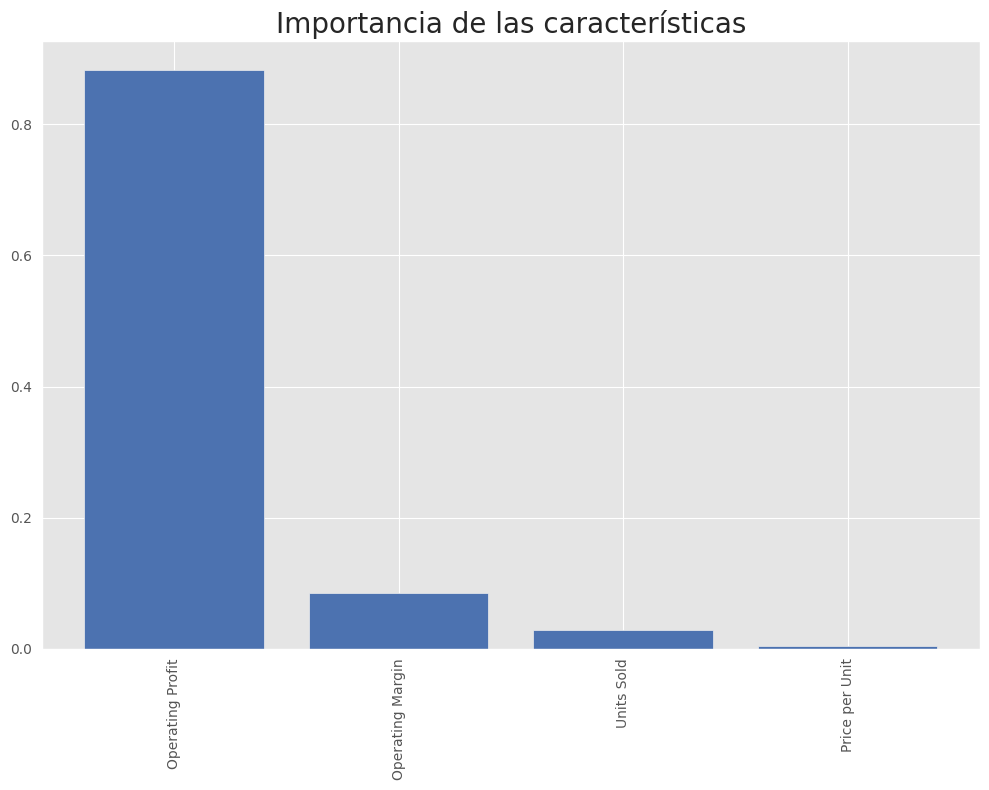

In [38]:
rf_model = RandomForestRegressor(max_depth=20, min_samples_split=2, n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Asumiendo que tienes una lista de nombres de características
feature_names = X_train.columns

# Imprimir la importancia de las características
for f in range(X_train.shape[1]):
    print(f"{feature_names[indices[f]]}: {importances[indices[f]]}")

# Graficar la importancia de las características
plt.figure(figsize=(10, 8))
plt.title("Importancia de las características", fontsize = 20, y = 1.0)
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


# CONCLUSIONES

Podemos decir que este proyecto tiene varias variables para poder satisfacer nuestras necesidades, entre ellas algunas tienen mucha mas relevancia que otras y conocer esta relevancia hace mas facil entender y realizar distintas gestiones, como la de un proyectado de ventas.

Identificamos que por ahora el metodo que esta funcionando es el 'online', para mi opinión personal segun los trabajos obtenidos, puedo decir que este método es muy rentable y muchos mas dinámico. Esto a diferencia de la venta en física, ahora, no digo que esto sea la venta ideal, no, pues no es lo mismo verlo por un catálogo que verlo en persona, es muy distinto y la experiencia no es la misma.

En conclusión, con estos datos podemos llegar a proyectarnos sobre las ventas en un determinado tiempo, y con nuestro modelo de aprendizaje sabemos la variable con mayor relevancia para nuestra nueva data. Así mismo, como la posible gestión que pueda utilizar la empresa para el incremento de sus ventas.